In [28]:
cd C:\Users\ArianStolk\Documents\GitHub\SPDC

C:\Users\ArianStolk\Documents\GitHub\SPDC


In [29]:
import cProfile
import re
import scipy
import numpy as np
# import gnumpy as np
import random
import scipy.optimize as opt
import cProfile
import re

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

In [30]:
%run main.py
%run physics.py

In [31]:
# lensd_result1=np.load("C:/Users/Arian Stolk/Documents/optim_sweep_27102017_120to180d5_col.npz")['arr_0']
lensd_result=np.load("C:/Users/ArianStolk/Documents/optim_sweep_12112017_20to100d5_ast06_asph75.npz")['arr_0']
# lensd_result=np.concatenate((lensd_result0,lensd_result1),axis=1)
# dist_list=list(flatten([np.linspace(20,95,16),np.linspace(120,175,12)]))
# lensd_result=np.array([np.load("C:/Users/Arian Stolk/Documents/optim_sweep_07112017_60to155d5_ast_asph_110_small.npz")['arr_0']])
dist_list=np.linspace(20,95,16)

print(lensd_result.shape,dist_list)

(3, 16, 3) [ 20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.
  95.]


In [36]:

Crystal1=Crystal(name = 'BBO1',material = 'BBO',position = [0,0,3],thickness = 6,orientation="up",cutangle=28.76*np.pi/180)
HalfWave = HWP(name='Hwp',material=None,position=[0,0,7],thickness=0,cutoff=500)
Crystal2=Crystal(name = 'BBO2',material = 'BBO',position = [0,0,11],thickness = 6,orientation="up",cutangle=28.76*np.pi/180)
Crystal3=Crystal(name = 'YVO1',material = 'YVO4',position = [0,0,19],thickness = 3.12 ,orientation="left",cutangle=90*np.pi/180)
ACH=Lens.asphere(position = [0,0,60],centre=[-0.6,0,0],f= 50)
Csetup=ExpSetup(Crystal1,HalfWave,Crystal2,Crystal3,ACH)
sim=Simulation(rays=[0],setup=Csetup,store_path=True,store_time=True)
sim.run(Ntot=120000000,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=[0.06,0.03],pump_focus=[8,8],l_min=650,theta_min=-2*np.pi/180,theta_max=2*np.pi/180,cutangle=28.76*np.pi/180)
SPDC_list=sim.start_list
print(len(sim.complete_results[0][0]))

vis=Visualization(simulation=sim)
rays_end = 19+3.12/2
vis.interpol_data(pos=rays_end)
downdown_start_list= vis.dummy_surface



print("Going to trace now")


vis.interpol_data(pos=rays_end)
downdown_start_list= vis.dummy_surface

def get_results(x,diam,numap):
    vis2.filter_results(fibre_pos=x,core_diam = diam,Num_Ap=numap)
    return [vis2.coincidences,vis2.singles,vis2.coincidences_SPDC_list,x]

# def get_results(x,diam,numap,lenspos):

#     pos_of_focus=vis2.get_focus_pos(pos=rays_end + x[0]+lenspos)
#     fibre_position=[pos_of_focus[0]+x[1],pos_of_focus[1]+x[2],rays_end + x[0]+lenspos]
#     vis2.filter_results(fibre_pos=fibre_position,core_diam = diam,Num_Ap=numap)
#     return [vis2.coincidences,vis2.singles,vis2.coincidences_SPDC_list,fibre_position]

27.9252680319 0.06 6.98131700798 0.03


C:\Users\ArianStolk\Documents\GitHub\SPDC\main.py:577: RuntimeWarning: invalid value encountered in arcsin
  angles =  np.arcsin(np.sin(angle)*indexfract)+np.arctan(position_on_lens*(alpha/np.cos(alpha)))


223801
Going to trace now
still got sent here but dont wanna


In [37]:
big_results=[[],[],[]]

for i,results in enumerate(lensd_result):
    numap=[0.1,0.1,0.22][i]
    diam=[0.005,0.025,0.05][i]
    
    for j,x in enumerate(results):
        lenspos=dist_list[j]
        ACH=Lens.achromat_r(position = [0,0,rays_end+lenspos],centre=[-0.6,0,0],f=200)
        ASPH=Lens.asphere(position = [0,0,rays_end+lenspos],centre=[-0.6,0,0],f=200)
        lens_used=[ASPH,ASPH,ASPH][i]
        sim2=Simulation(rays=[0],setup=ExpSetup(lens_used))
        sim2.start_list=downdown_start_list
        sim2.run()
        vis2=Visualization(simulation=sim2)
        
        sim2.start_list=downdown_start_list
        sim2.run()
        
        vis2=Visualization(simulation=sim2)
        vis2.SPDC_list=SPDC_list
        big_results[i].append(get_results(x,diam,numap))

C:\Users\ArianStolk\Documents\GitHub\SPDC\main.py:577: RuntimeWarning: invalid value encountered in arcsin
  angles =  np.arcsin(np.sin(angle)*indexfract)+np.arctan(position_on_lens*(alpha/np.cos(alpha)))
C:\Users\ArianStolk\Documents\GitHub\SPDC\main.py:384: RuntimeWarning: invalid value encountered in less
  core_dist_check=((pos-fibre_pos)*(pos-fibre_pos)).sum(axis=1)<(core_diam/2)**2
C:\Users\ArianStolk\Documents\GitHub\SPDC\main.py:385: RuntimeWarning: invalid value encountered in less
  inc_angle_check=(angle*angle).sum(axis=1)<Num_Ap**2


In [27]:
big_results[0][0][2][3]

[array([], shape=(0, 3), dtype=float32),
 array([], shape=(0, 2), dtype=float64),
 array([], shape=(0, 1), dtype=float32)]

C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


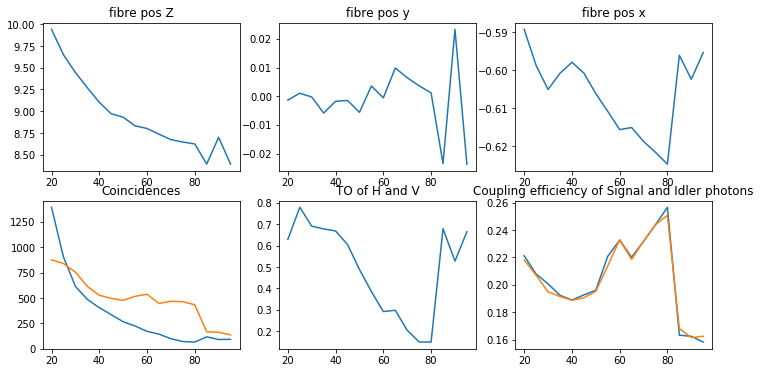

C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


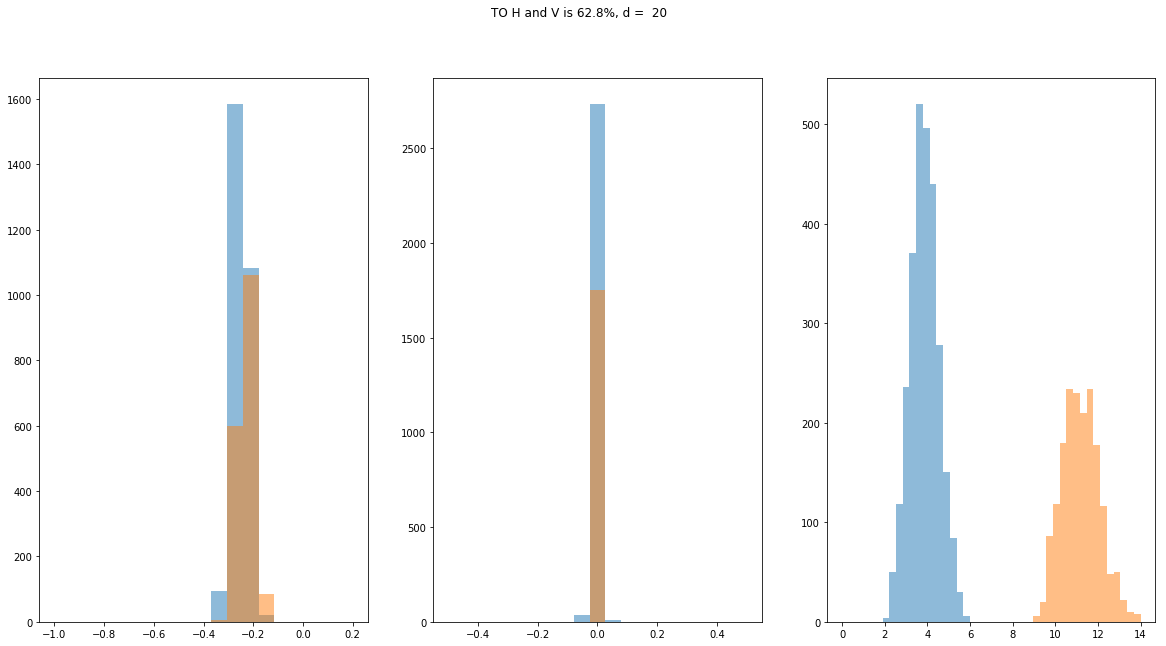

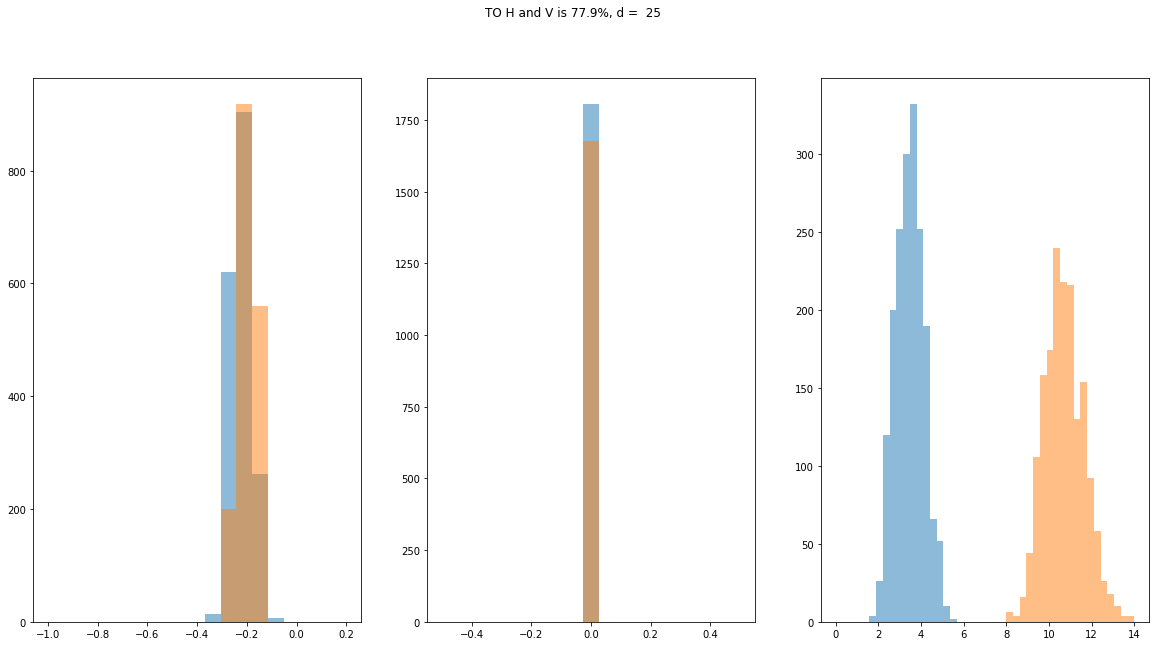

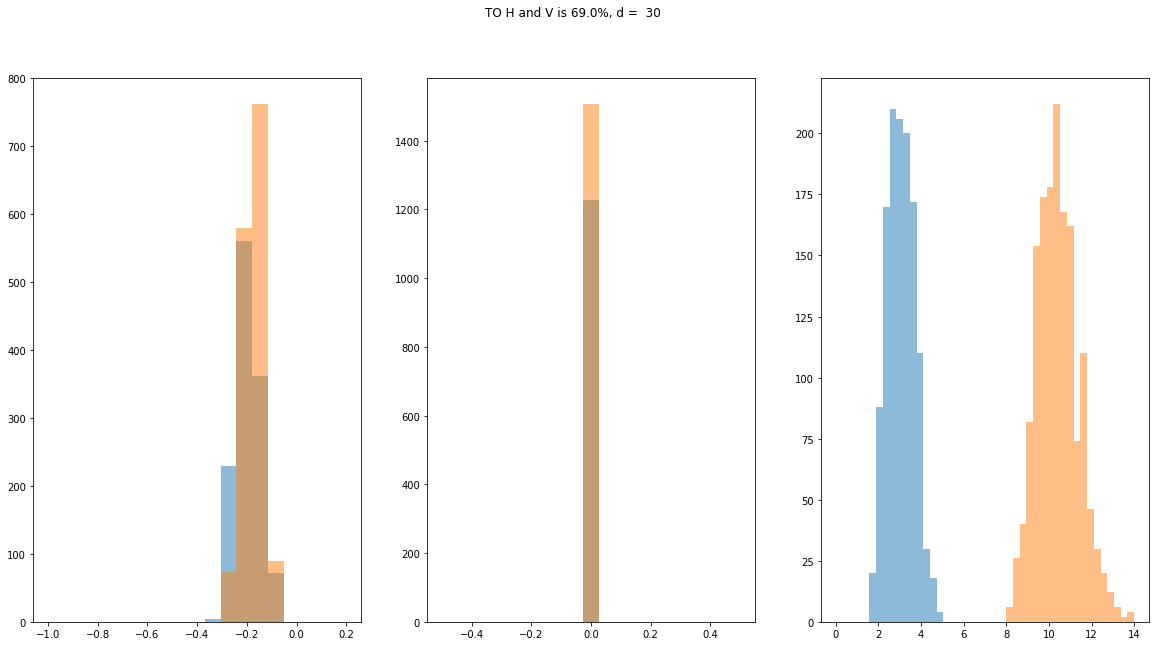

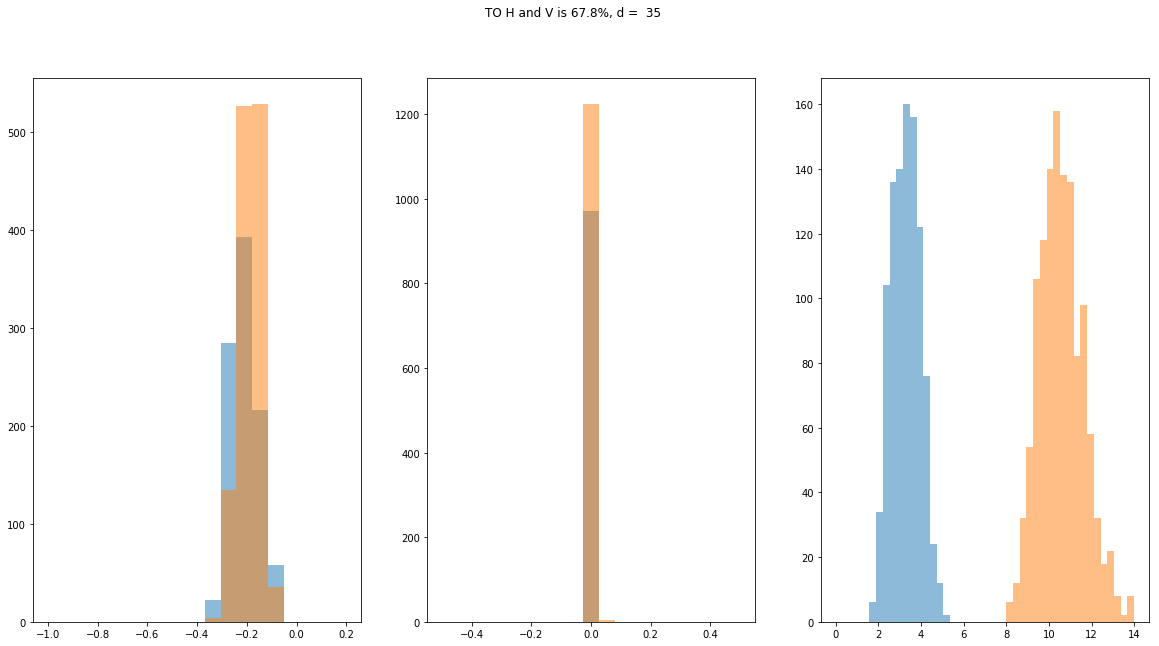

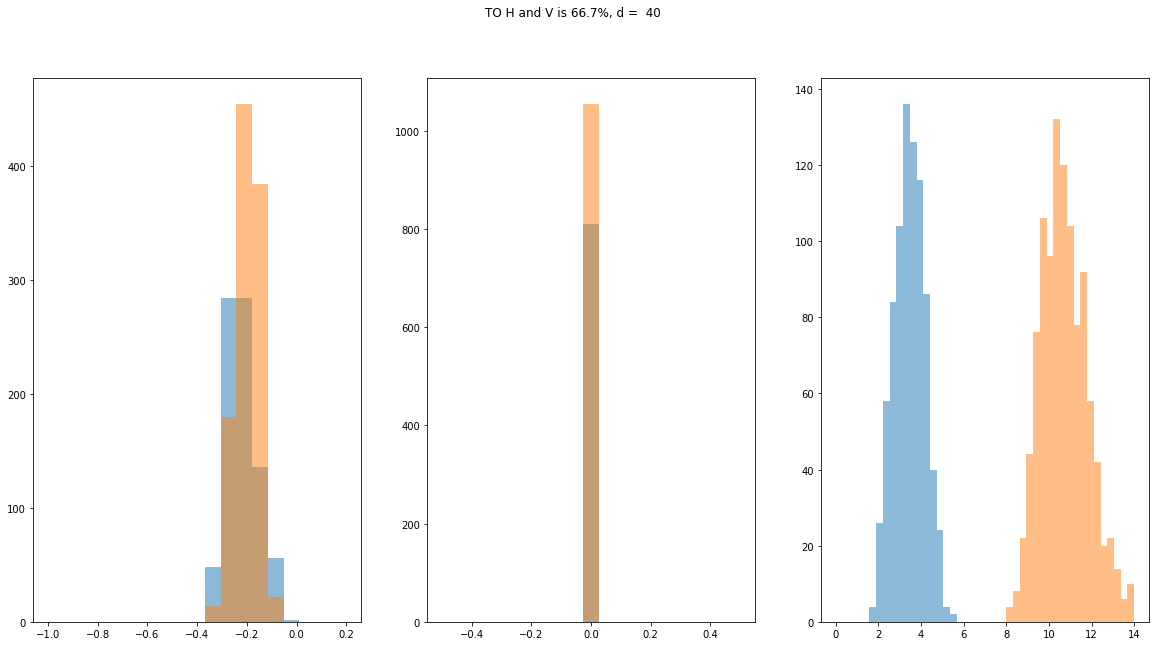

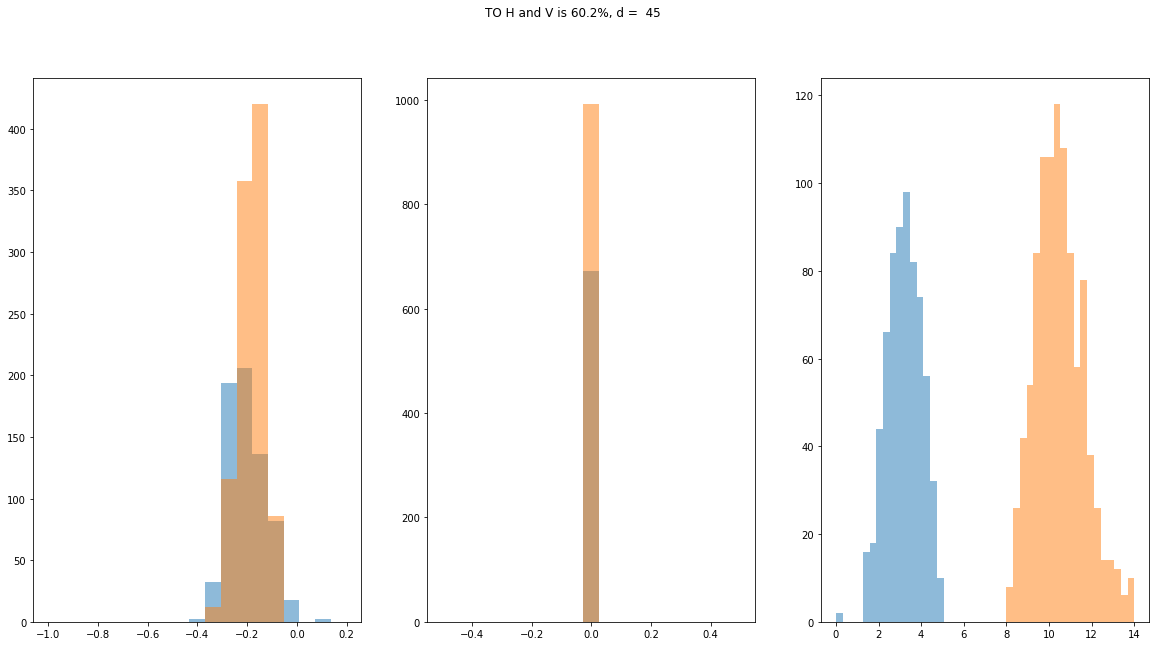

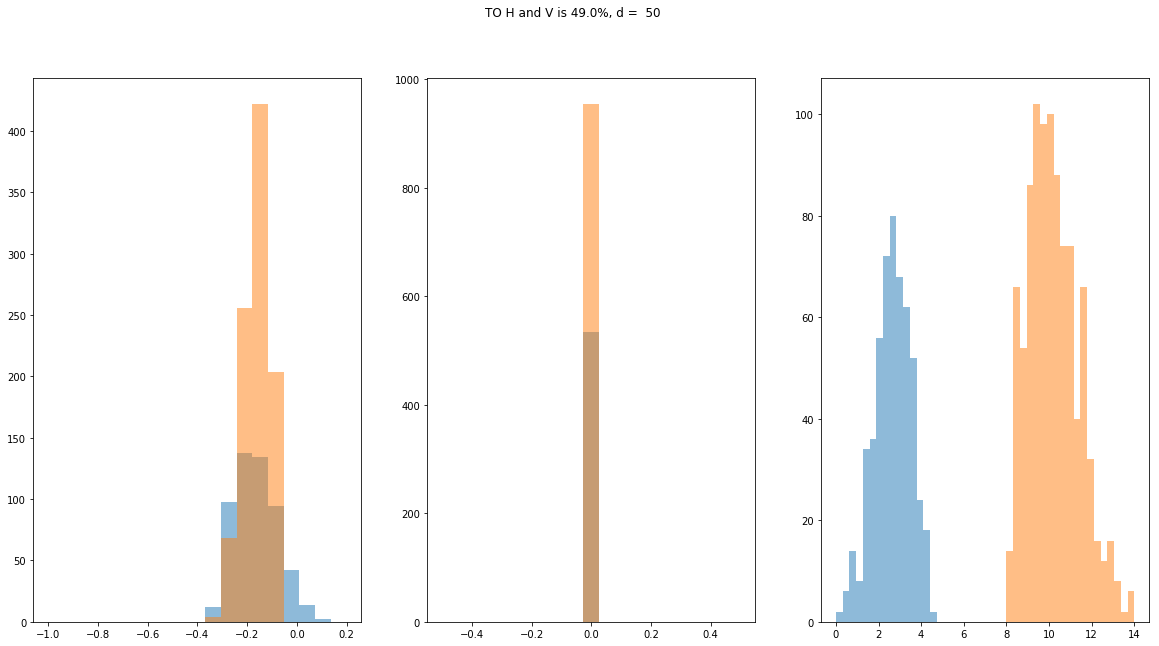

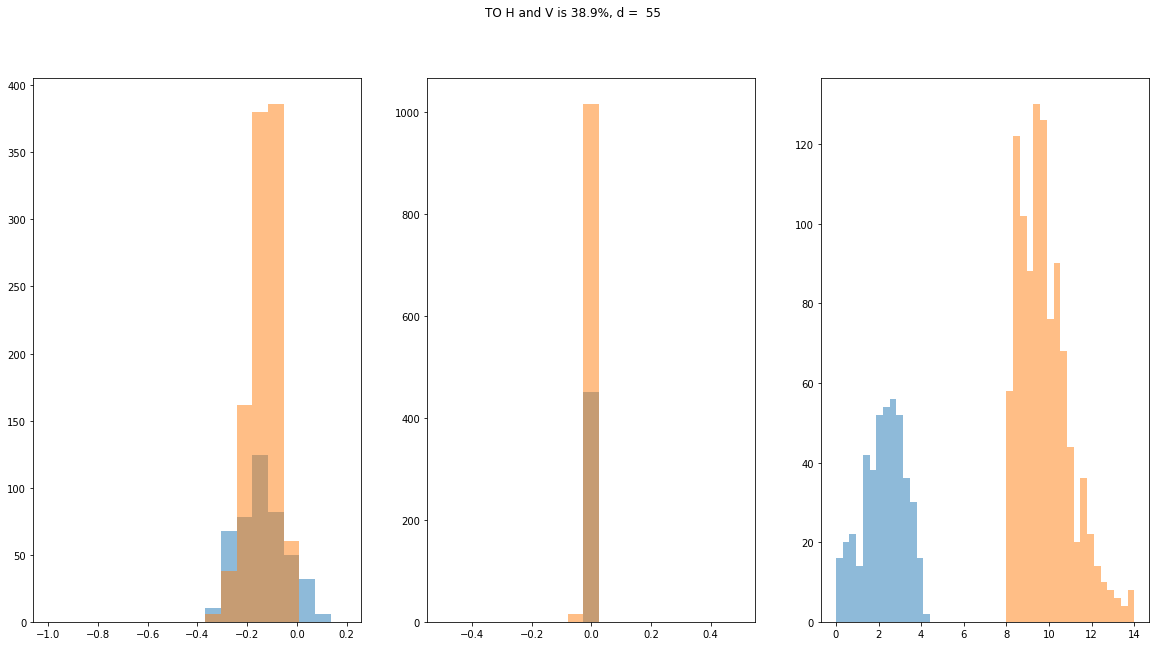

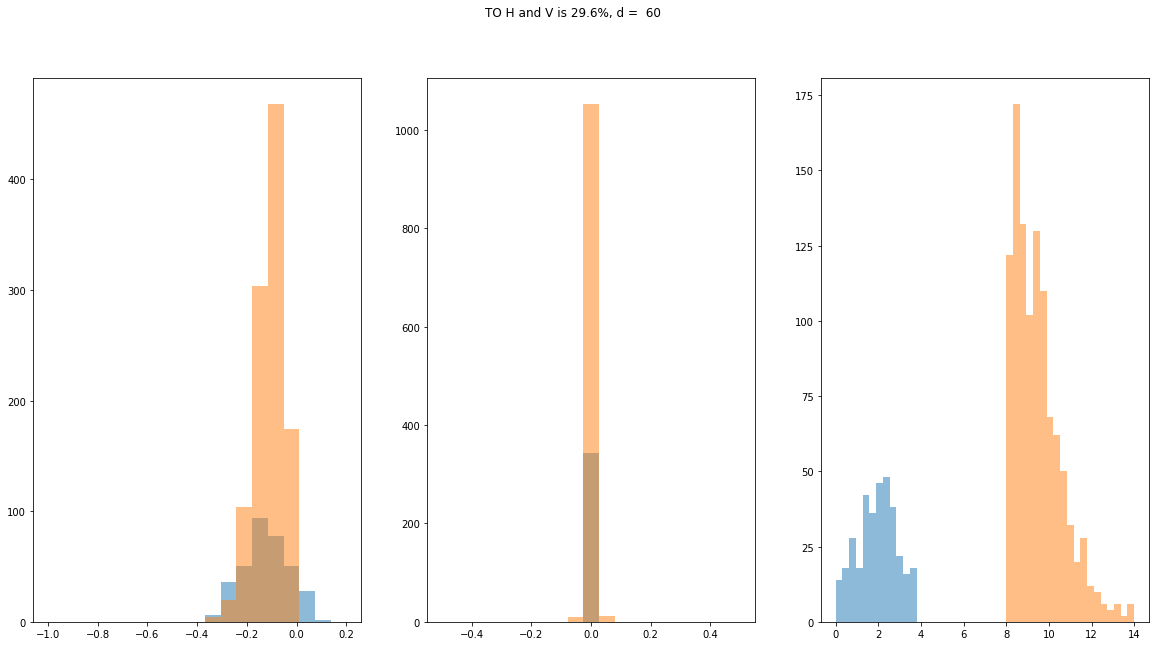

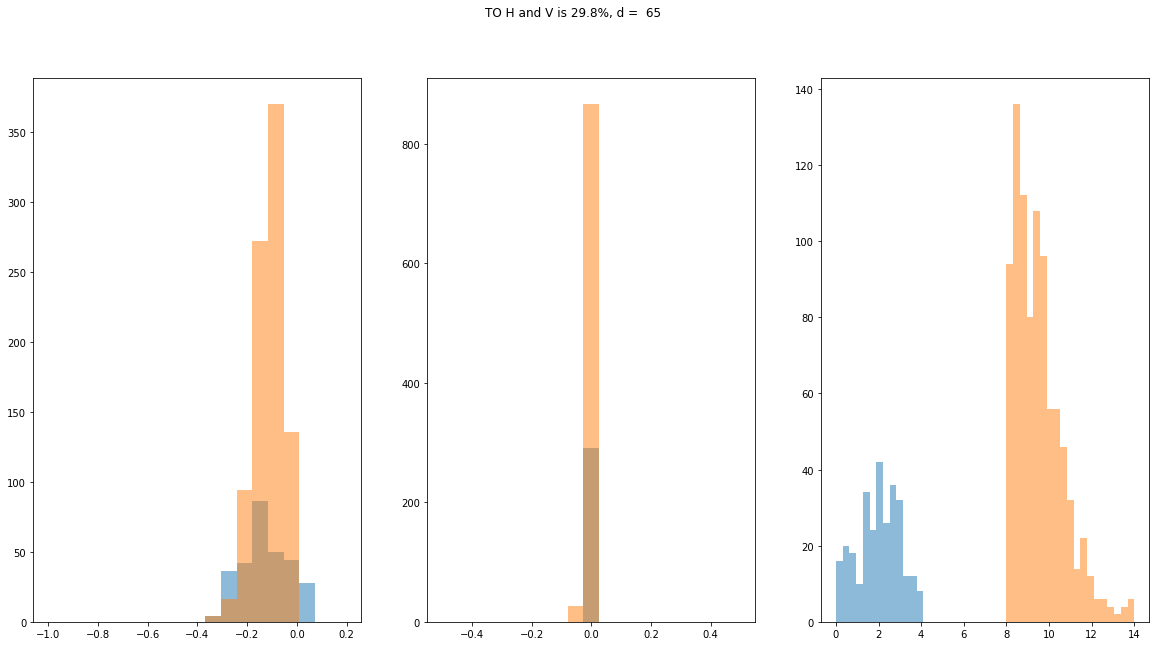

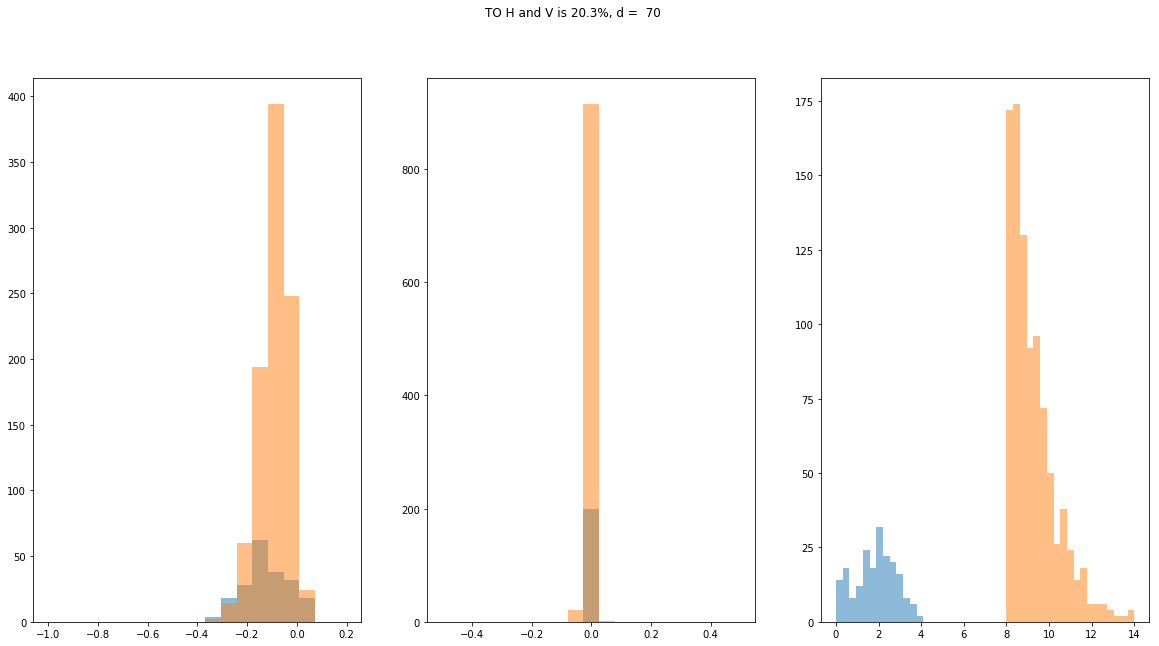

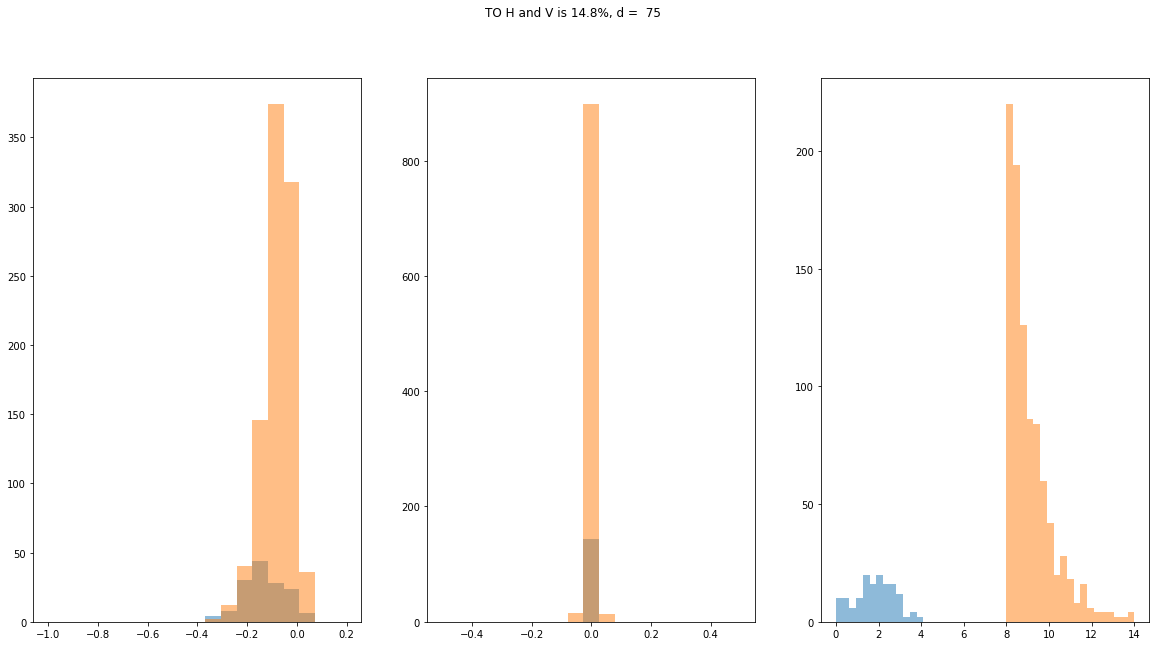

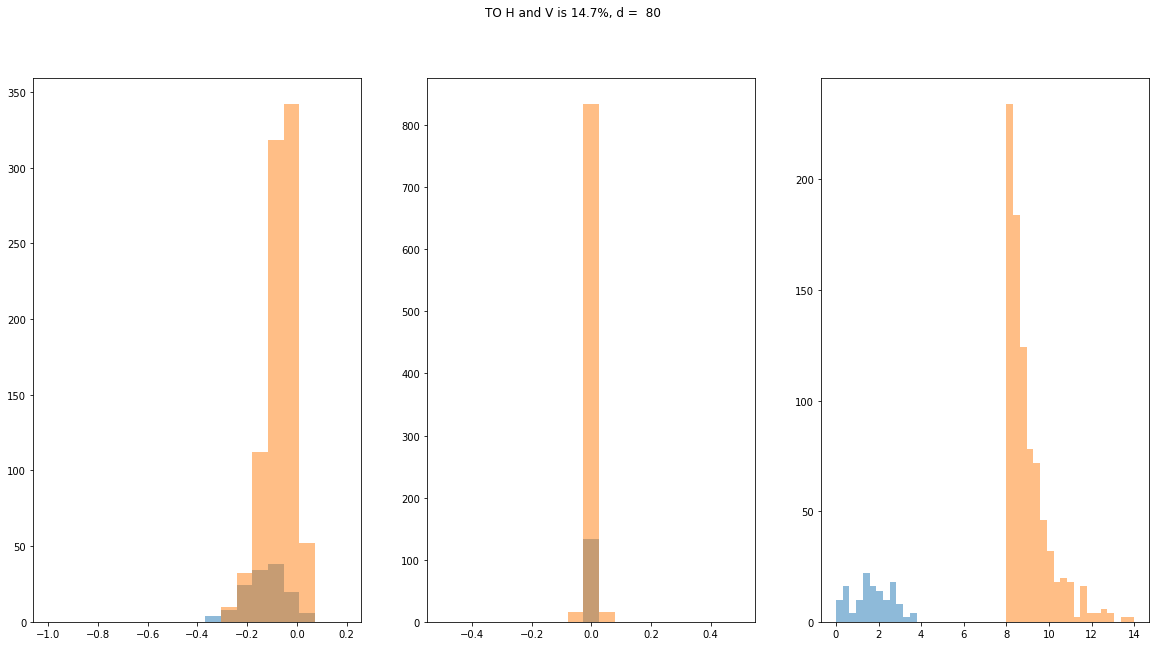

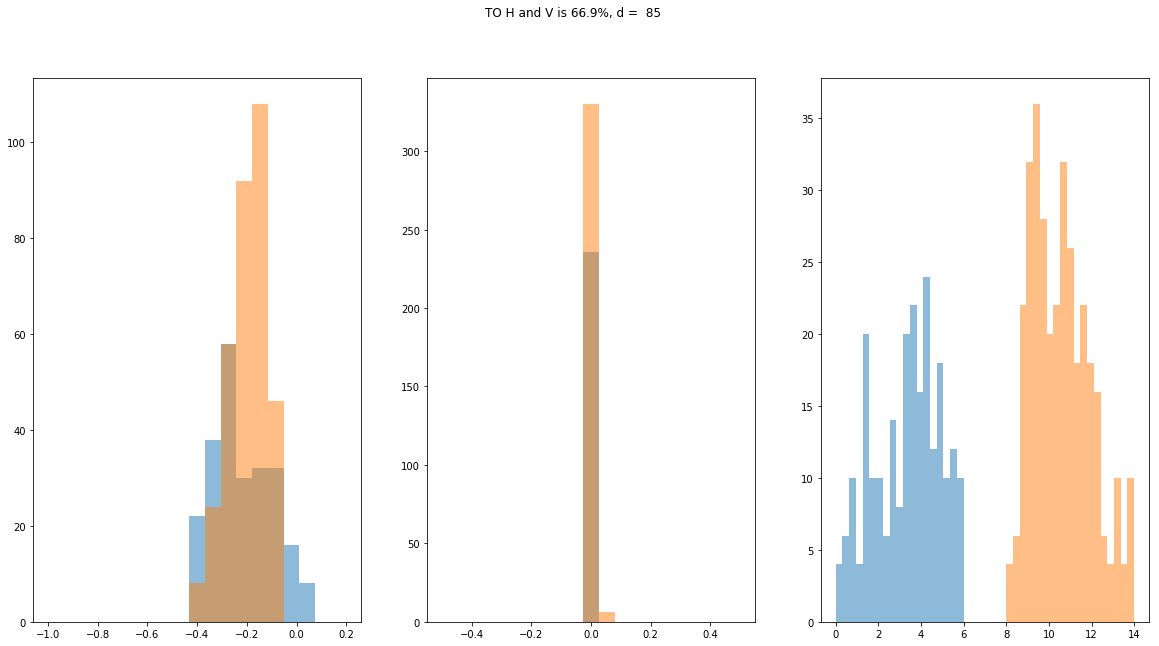

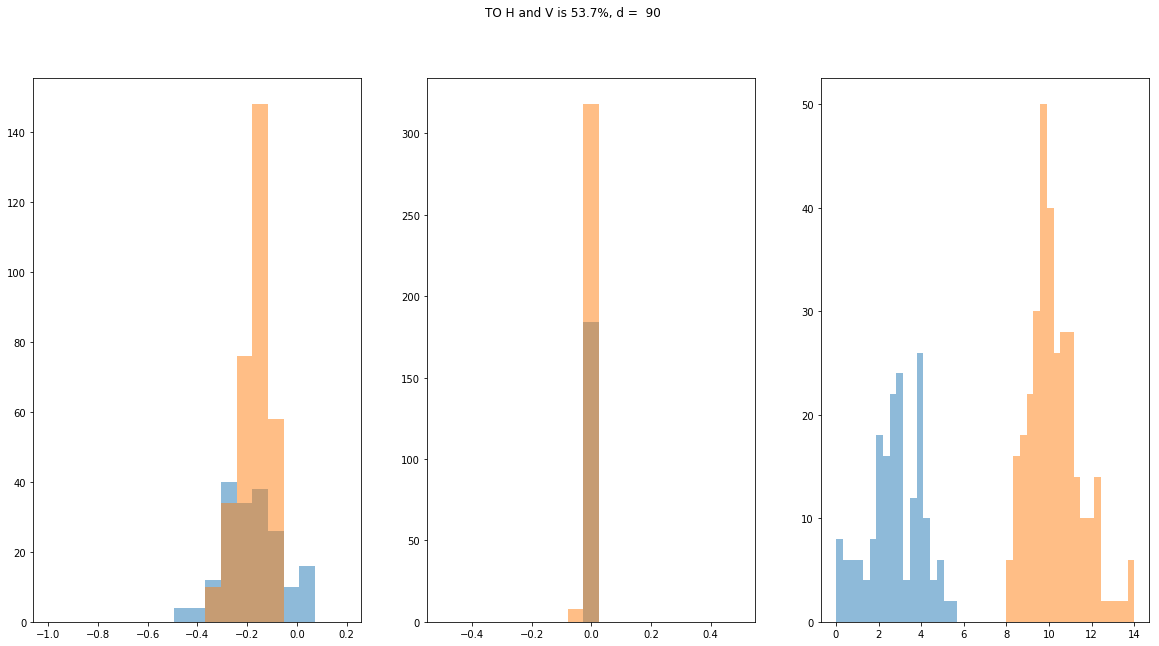

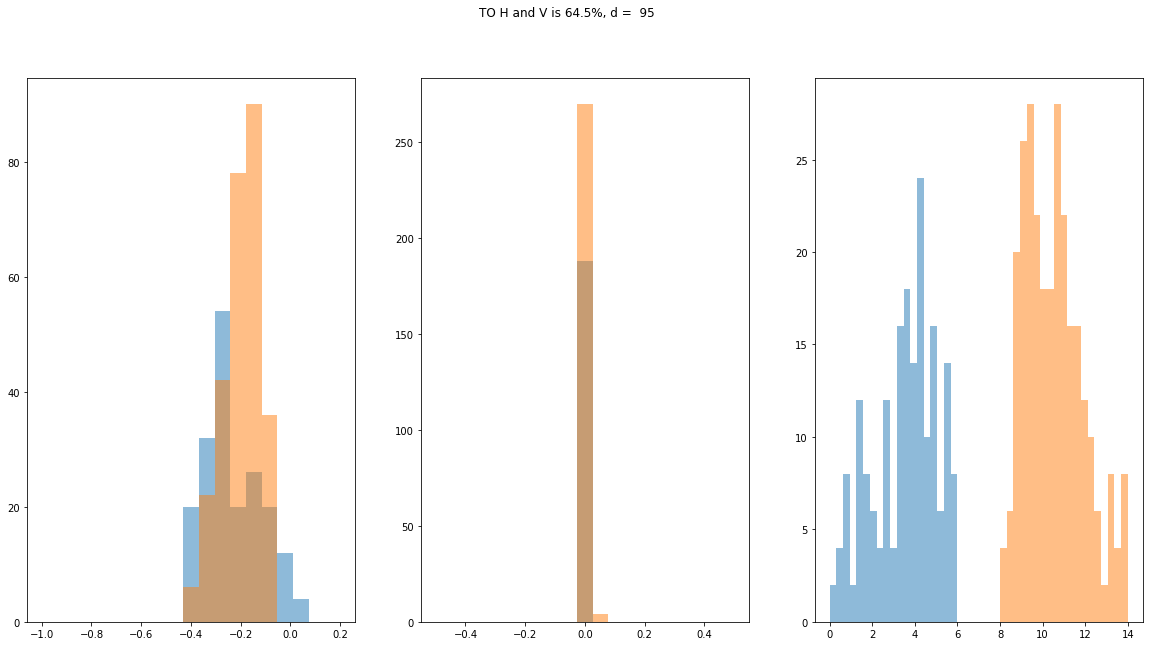

In [39]:
def showresults_sweep(results= big_results[0]):
    overlaplist=[]
    for i,x in enumerate(results):
        if len(x[0][0][3])>0 and len(x[0][1][3])>0 and len(x[0][2][3])>0 and len(x[0][3][3])>0:
            bins1=np.histogram(1e15*(x[0][0][3]-x[0][1][3]),bins=np.linspace(-200,1700,1900/50))
            bins2=np.histogram(1e15*(x[0][2][3]-x[0][3][3]),bins=np.linspace(-200,1700,1900/50))
            overlap=np.sum(np.min((bins1[0],bins2[0]),axis=0))/max(sum(bins1[0]),sum(bins2[0]))
            overlaplist.append(overlap)
        else:
            overlaplist.append(0)
   
    y = dist_list
    
    fig, ax = plt.subplots(2, 3,figsize=(12,6))
    
    ax[1,0].plot(y,[[len(x[0][0][0]),len(x[0][2][0])] for x in results])
    ax[1,0].set_title('Coincidences')
    
    ax[1,1].plot(y,overlaplist)
    ax[1,1].set_title('TO of H and V')
    
    ax[0,0].plot(y,[x[3][2]-y[k]-rays_end for k,x in enumerate(results)])
    ax[0,0].set_title('fibre pos Z')
    
    ax[0,1].plot(y,[x[3][1] for x in results])
    ax[0,1].set_title('fibre pos y')
    
    ax[0,2].plot(y,[x[3][0] for x in results])
    ax[0,2].set_title('fibre pos x')

    ax[1,2].plot(y,[[(len(x[0][0][0])+len(x[0][2][0]))/(1+len(x[1][0][0])+len(x[1][2][0])),(len(x[0][0][0])+len(x[0][2][0]))/(1+len(x[1][1][0])+len(x[1][3][0]))]  if (len(x[1][0][0])+len(x[1][2][0]))>0 else [0,0] for x in results])
    ax[1,2].set_title('Coupling efficiency of Signal and Idler photons')
      
    
    plt.show()
    
#     plt.figure()
#     plt.plot(y,[[len(x[1][0][0]),len(x[1][1][0]),len(x[1][2][0]),len(x[1][3][0])] for x in results],label=['1','2','3','4'])
#     plt.legend()
#     plt.title('Singles for H and V with respect to lens position')
#     plt.show()
    

#     for i,x in enumerate(results):
#         plt.figure()
#         plt.hist(np.concatenate((x[1][0][2],x[1][1][2])),np.linspace(600,1100,500/10),alpha=0.5)
#         plt.hist(np.concatenate((x[1][2][2],x[1][3][2])),np.linspace(600,1100,500/10),alpha=0.5)
#         plt.title('TO H and V is {:03.1f}%'.format(100*overlaplist[i]))
#         plt.show()
            


###Start positions###          
    for i,x in enumerate(results):
        f, axarr = plt.subplots(1, 3,figsize=(20,10))
        
        for j in range(3):
            axarr[j].hist((np.concatenate((x[2][0][0],x[2][1][0])).T)[j],bins=[np.linspace(-1,0.2,20),np.linspace(-0.5,0.5,20),np.linspace(0,6,20)][j],alpha=0.5)
            axarr[j].hist([0.4,0,0][j]+(np.concatenate((x[2][2][0],x[2][3][0])).T)[j],bins=[np.linspace(-1,0.2,20),np.linspace(-0.5,0.5,20),np.linspace(8,14,20)][j],alpha=0.5)

            bins1=np.histogram(1e15*(x[0][0][3]-x[0][1][3]),bins=np.linspace(-200,2000,2200/50))
            bins2=np.histogram(1e15*(x[0][2][3]-x[0][3][3]),bins=np.linspace(-200,2000,2200/50))
            overlap=np.sum(np.min((bins1[0],bins2[0]),axis=0))/max(sum(bins1[0]),sum(bins2[0],1))

            f.suptitle('TO H and V is {:03.1f}%, d = {:3.0f}'.format(overlap*100,dist_list[i]))
        plt.show()

# ######Start angles#########
#     for i,x in enumerate(results):
#         opangle_H = np.sign([y[0] for y in x[2][0][1]])*0.5*np.linalg.norm((x[2][0][1]-x[2][1][1]),axis=1)
#         opangle_V = np.sign([y[0] for y in x[2][2][1]])*0.5*np.linalg.norm((x[2][2][1]-x[2][3][1]),axis=1)
        
#         propangle_H = 0.5*(x[2][0][1]+x[2][1][1])
#         propangle_V = 0.5*(x[2][2][1]+x[2][3][1])
#         f, axarr = plt.subplots(1, 3,figsize=(20,10))
        
#         axarr[0].hist(180/np.pi*opangle_H,np.linspace(-1.8,1.8,40),alpha=0.5)
#         axarr[0].hist(180/np.pi*opangle_V,np.linspace(-1.8,1.8,40),alpha=0.5)
#         axarr[1].hist(np.sign([y[0] for y in propangle_H])*180/np.pi*np.linalg.norm(propangle_H,axis=1),np.linspace(-.1,0.1,40),alpha=0.5)
#         axarr[1].hist(np.sign([y[0] for y in propangle_V])*180/np.pi*np.linalg.norm(propangle_V,axis=1),np.linspace(-0.1,0.1,40),alpha=0.5)
#         axarr[2].scatter([180/np.pi*x[0] for x in propangle_H],[180/np.pi*x[1] for x in propangle_H],alpha=0.5)
#         axarr[2].scatter([180/np.pi*x[0] for x in propangle_V],[180/np.pi*x[1] for x in propangle_V],alpha=0.5)
#         axarr[2].set_xlim([-0.1,0.1])
#         axarr[2].set_ylim([-0.1,0.1])

#         bins1=np.histogram(1e15*(x[0][0][3]-x[0][1][3]),bins=np.linspace(-200,1700,1900/50))
#         bins2=np.histogram(1e15*(x[0][2][3]-x[0][3][3]),bins=np.linspace(-200,1700,1900/50))
#         overlap=np.sum(np.min((bins1[0],bins2[0]),axis=0))/max(sum(bins1[0]),sum(bins2[0],1))

#         f.suptitle('TO H and V is {:03.1f}%, d = {:3.0f}'.format(overlap*100,20+5*i))
#         plt.show()

# ######Start angles with respect to position (corrected for walkoff)#########
#     for i,x in enumerate(results):
        
#         propangle_H = 0.5*(x[2][0][1]+x[2][1][1])
#         propangle_V = 0.5*(x[2][2][1]+x[2][3][1])
        
#         opangle_H = 0.5*(x[2][0][1]-x[2][1][1])
#         opangle_V = 0.5*(x[2][2][1]-x[2][3][1])
#         f, axarr = plt.subplots(1, 3,figsize=(20,10))
        
#         ax1=axarr[0].scatter([180/np.pi*x[0] for x in propangle_H],[y[0] + 0.4*y[2]/6  for y in x[2][0][0]],c=[y[2]/12 for y in x[2][0][0]],cmap='plasma',vmin=0,vmax=1)
#         ax3=axarr[2].scatter([180/np.pi*x[1] for x in propangle_H],[y[1] for y in x[2][0][0]],cmap='plasma',c=[y[2]/12 for y in x[2][0][0]],vmin=0,vmax=1)
#         ax1=axarr[0].scatter([180/np.pi*x[0] for x in propangle_V],[y[0] +0.4*(y[2]-8)/6 for y in x[2][2][0]],c=[(y[2])/12 for y in x[2][2][0]],cmap='plasma',vmin=0,vmax=1)
#         ax3=axarr[2].scatter([180/np.pi*x[1] for x in propangle_V],[y[1] for y in x[2][2][0]],c=[(y[2])/12 for y in x[2][2][0]],cmap='plasma',vmin=0,vmax=1)
#         ax3=axarr[1].scatter([x[0] for x in x[2][0][0]],[x[2] for x in x[2][0][0]],c=[(y[2])/12 for y in x[2][0][0]],cmap='plasma',vmin=0,vmax=1)
#         ax3=axarr[1].scatter([x[0] for x in x[2][2][0]],[x[2] for x in x[2][2][0]],c=[(y[2])/12 for y in x[2][2][0]],cmap='plasma',vmin=0,vmax=1)
# #         axarr[1].set_xlim([-0.5,0.5])
#         axarr[1].set_xlabel('propangle in degree vs H y')
# #         axarr[1].set_ylim([-0.4,0.4])
# #         axarr[0].set_xlim([-0.5,0.5])
#         axarr[0].set_xlabel('propangle in degree vs H x')
# #         axarr[0].set_ylim([-0.4,0.4])
# #         axarr[2].set_xlim([-0.5,0.5])
# #         axarr[2].set_xlabel('propangle in degree vs H x')
# #         axarr[2].set_ylim([-0.4,0.4])
# #         axarr[3].set_xlim([-0.5,0.5])
# #         axarr[3].set_xlabel('propangle in degree vs V y')
# #         axarr[3].set_ylim([-0.4,0.4])
#         f.colorbar(ax1,ax=axarr[0])
#         bins1=np.histogram(1e15*(x[0][0][3]-x[0][1][3]),bins=np.linspace(-200,1700,1900/50))
#         bins2=np.histogram(1e15*(x[0][2][3]-x[0][3][3]),bins=np.linspace(-200,1700,1900/50))
#         overlap=np.sum(np.min((bins1[0],bins2[0]),axis=0))/max(sum(bins1[0]),sum(bins2[0],1))

#         f.suptitle('TO H and V is {:03.1f}%, d = {:3.0f}'.format(overlap*100,20+5*i))
#         plt.show()

showresults_sweep(results= big_results[2])

C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\ArianStolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


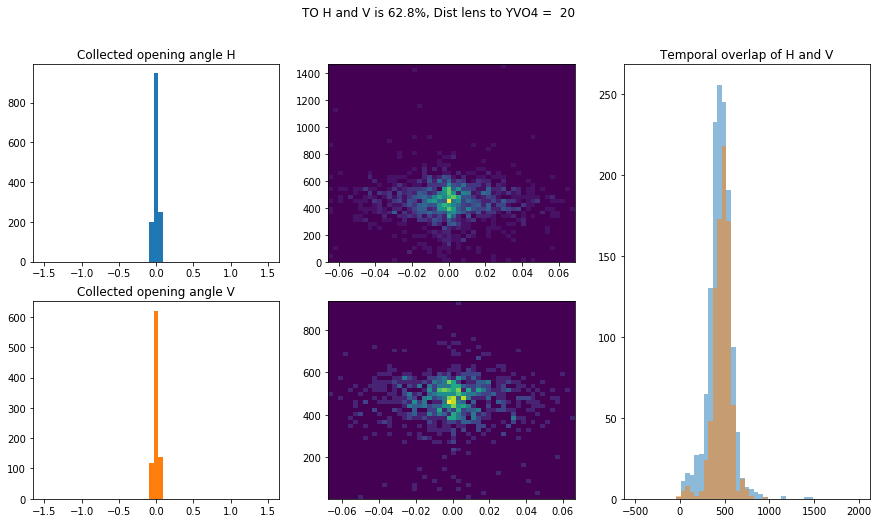

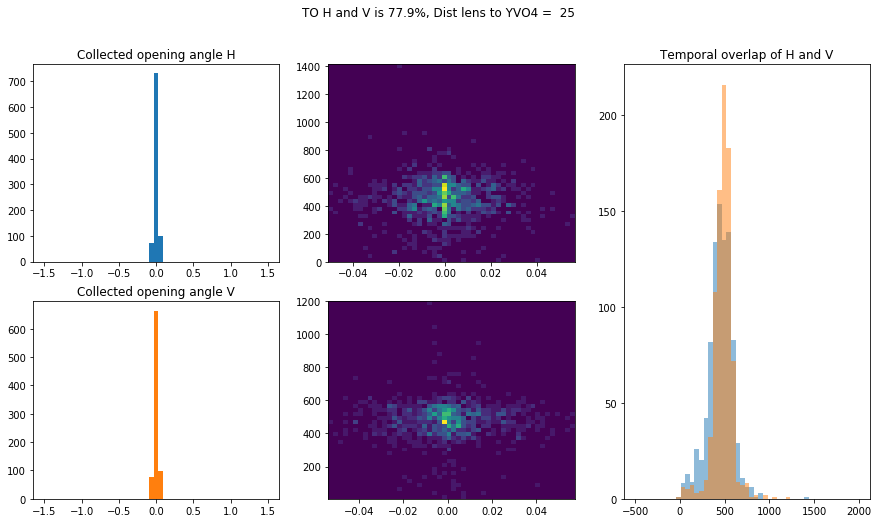

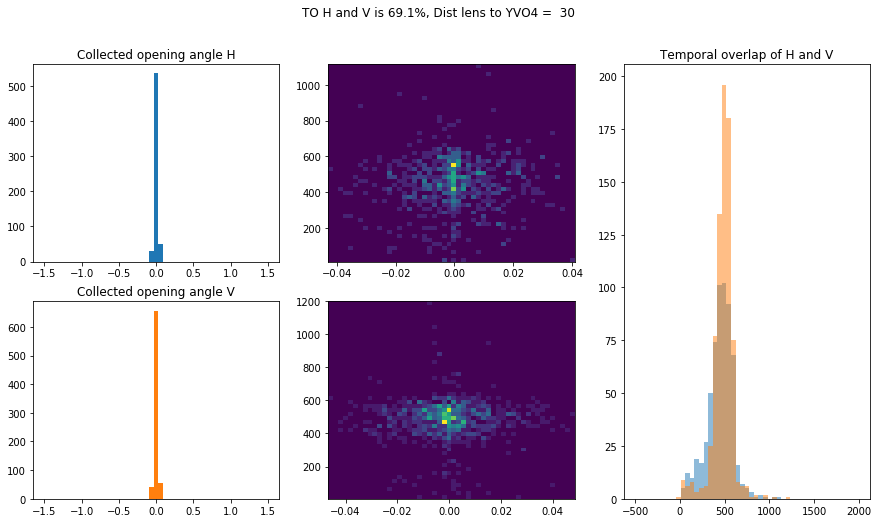

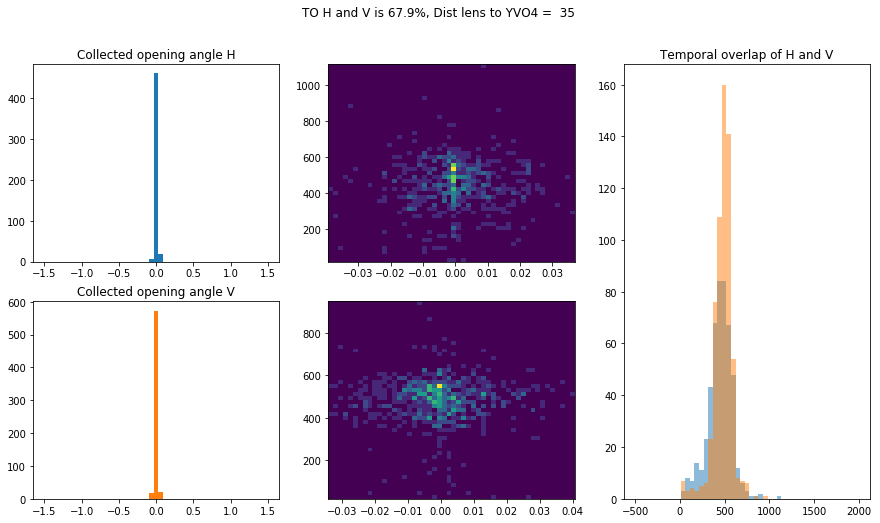

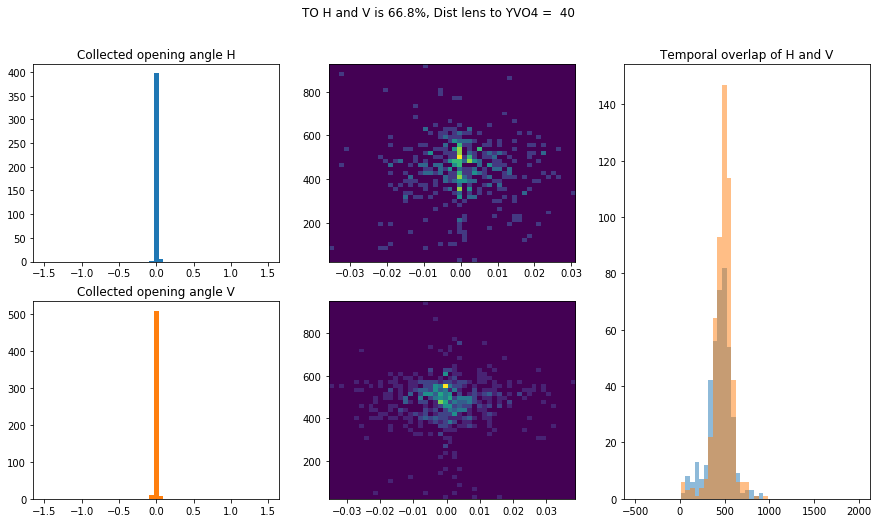

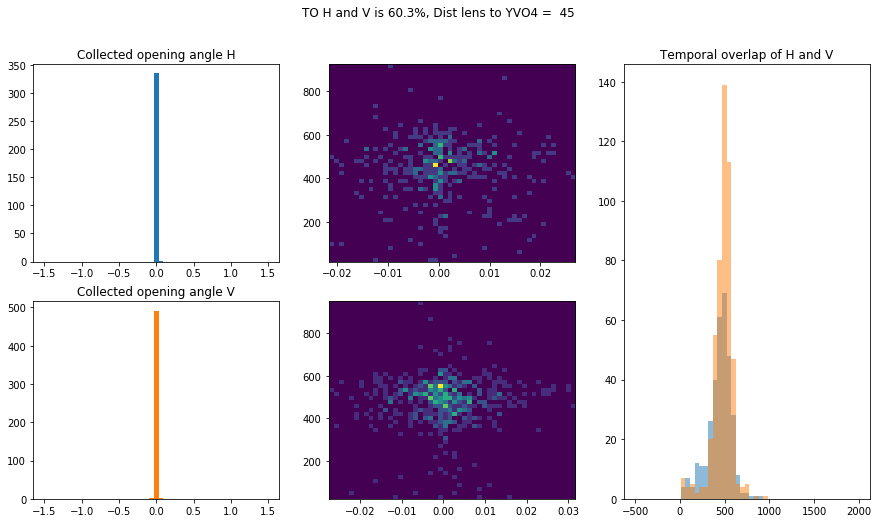

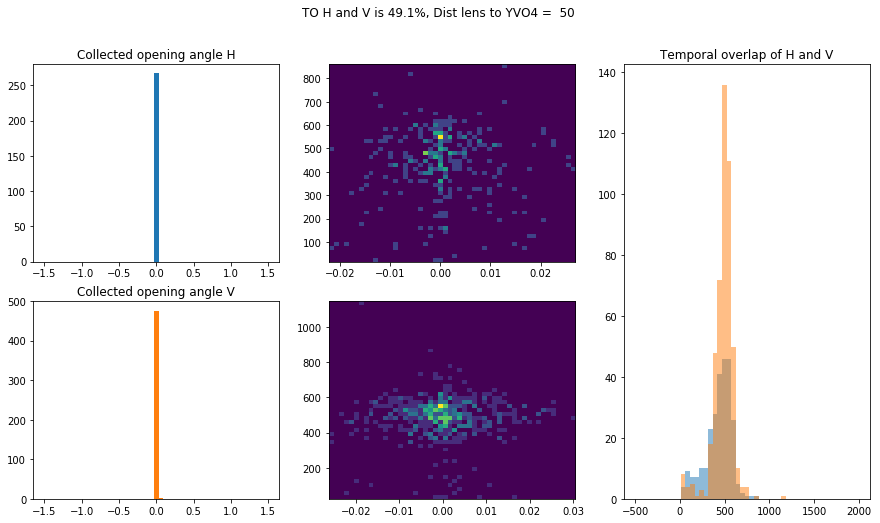

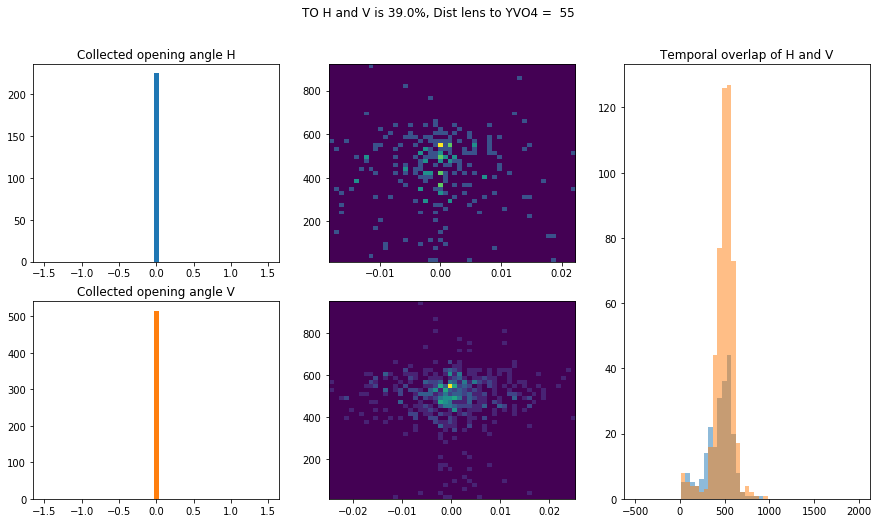

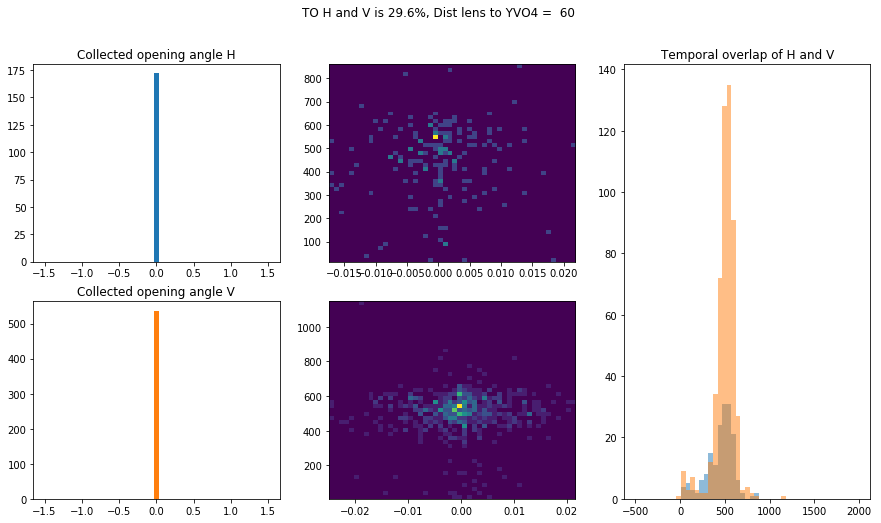

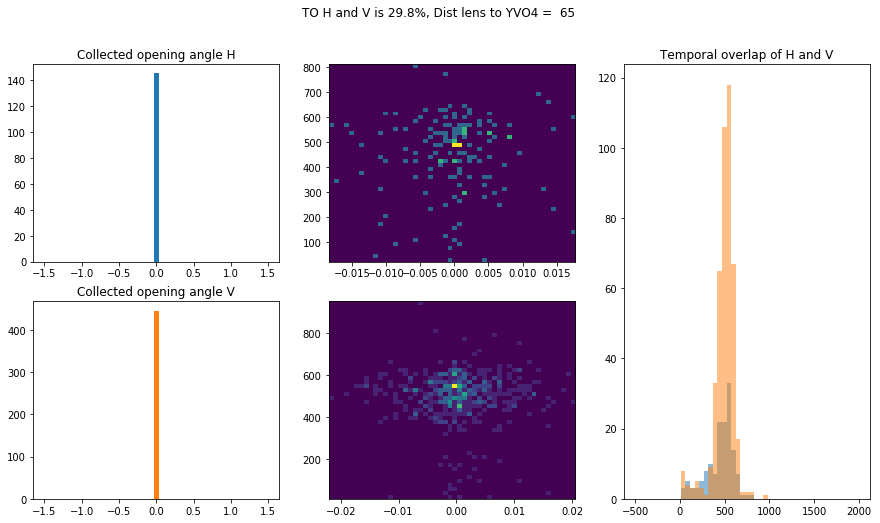

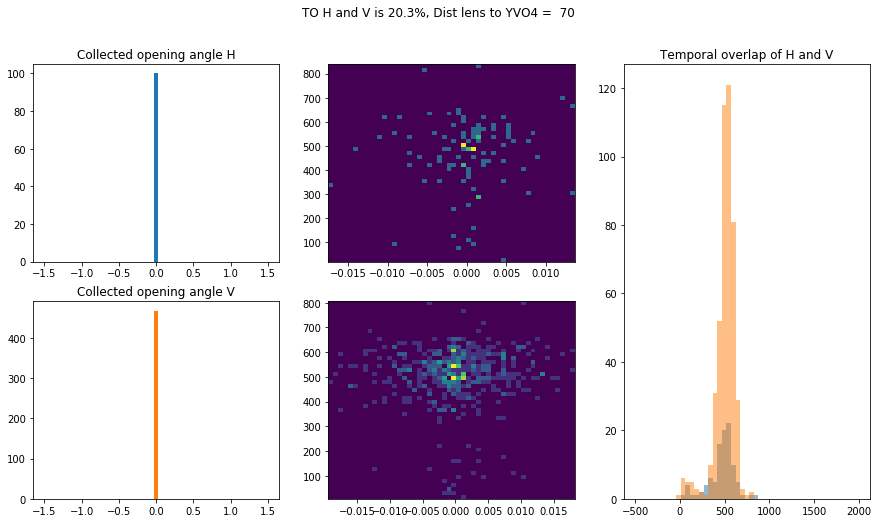

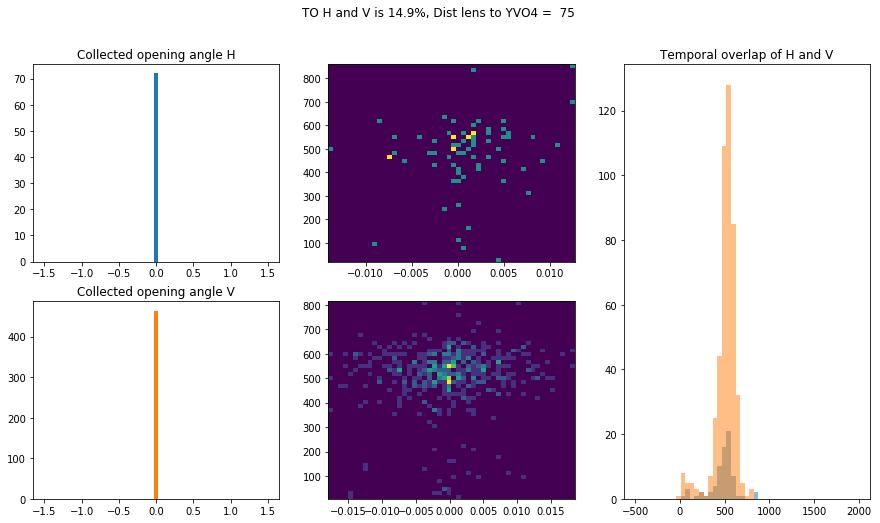

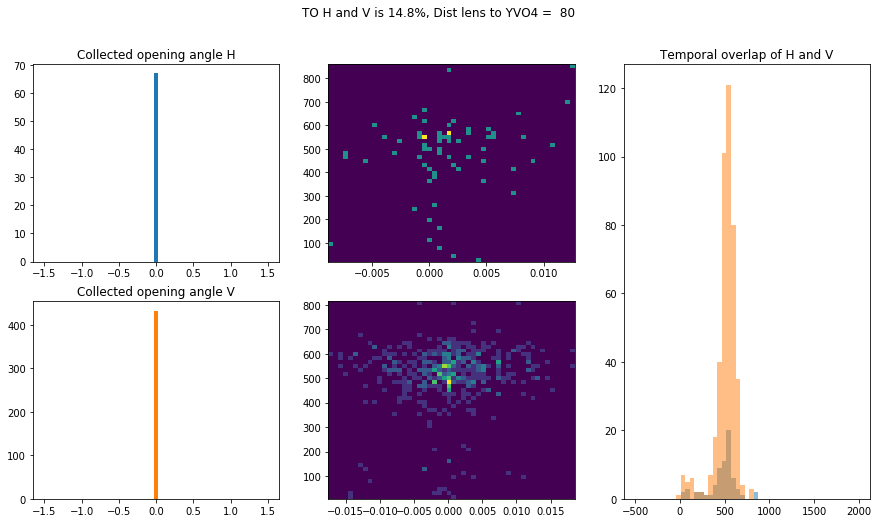

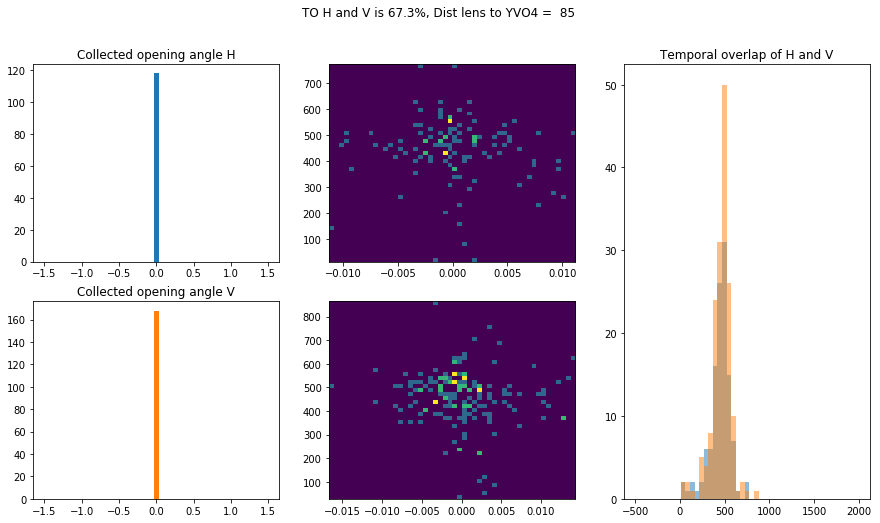

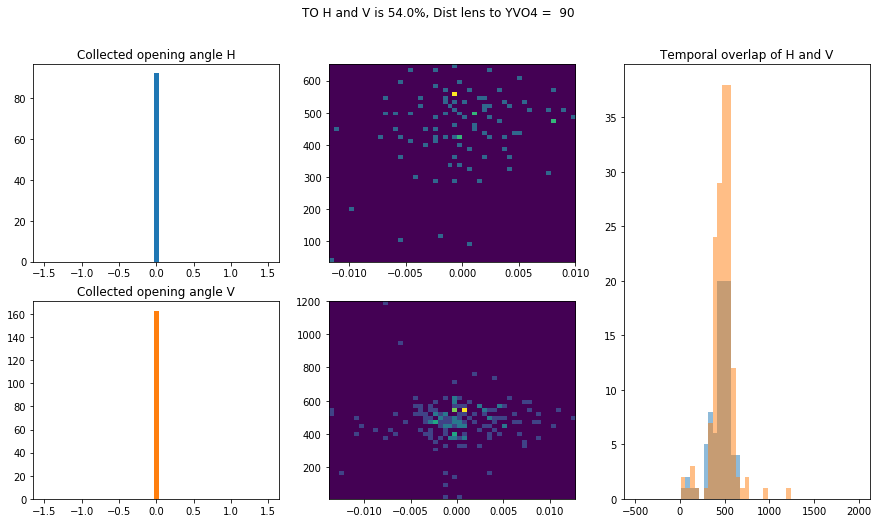

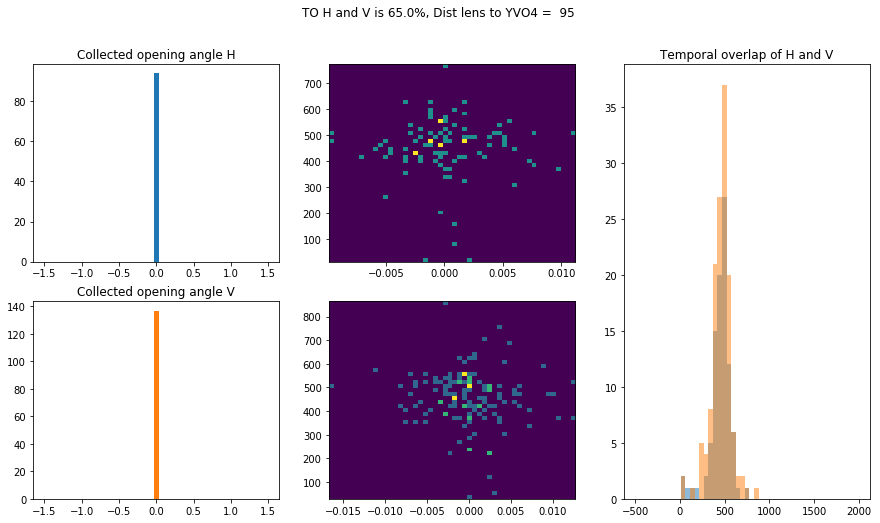

In [41]:
def angle_subplot(subplot=[],data=[],lims=[[],[]]):
   
    x=np.linspace(lims[0][0],lims[0][1],20)
    y=np.linspace(lims[1][0],lims[1][1],20)
    subplot.hist2d([180/np.pi*x[1] for x in data],[180/np.pi*x[0] for x in data],bins=(x,y),normed=True)
    subplot.set_xlim(lims[0])
    subplot.set_ylim(lims[1])

for i,x in enumerate(big_results[2]):

    opangle_H = 0.5*(x[2][0][1]-x[2][1][1])
    opangle_V = 0.5*(x[2][2][1]-x[2][3][1])
    
    propangle_H = 0.5*(x[2][0][1]+x[2][1][1])
    propangle_V = 0.5*(x[2][2][1]+x[2][3][1])
    
    fig = plt.figure(figsize=(15,8))
    
    grid = gridspec.GridSpec(2,3)
    ax1 = plt.subplot(grid[0, 0])
    ax2 = plt.subplot(grid[1, 0])
    ax3 = plt.subplot(grid[0, 1])
    ax4 = plt.subplot(grid[1, 1])
    ax5 = plt.subplot(grid[0:, -1])
    
    if len(x[0][0][3])>0 and len(x[0][1][3])>0 and len(x[0][2][3])>0 and len(x[0][3][3])>0:
        
        ax5.hist(1e15*(x[0][0][3]-x[0][1][3]),np.linspace(-500,2000,2500/50),alpha=0.5)
        ax5.hist(1e15*(x[0][2][3]-x[0][3][3]),np.linspace(-500,2000,2500/50),alpha=0.5)
        ax5.set_title("Temporal overlap of H and V")

#         ax5.hist(1e15*((x[0][0][3]+x[0][1][3])-min((x[0][0][3]+x[0][1][3])))/2,20,alpha=0.5)
#         ax5.hist(1e15*((x[0][2][3]+x[0][3][3])-min((x[0][2][3]+x[0][3][3])))/2,20,alpha=0.5)
#         ax5.set_title("Phase stability of of H and V")

        bins1=np.histogram(1e15*(x[0][0][3]-x[0][1][3]),bins=np.linspace(-200,2000,2200/50))
        bins2=np.histogram(1e15*(x[0][2][3]-x[0][3][3]),bins=np.linspace(-200,2000,2200/50))
        overlap=np.sum(np.min((bins1[0],bins2[0]),axis=0))/max(sum(bins1[0]),sum(bins2[0]))
    
    fig.suptitle('TO H and V is {:03.1f}%, Dist lens to YVO4 = {:3.0f}'.format(overlap*100,dist_list[i]))
    ax1.hist(np.sign([y[0] for y in propangle_H])*np.linalg.norm(opangle_H,axis=1)*180/np.pi,bins=np.linspace(-1.5,1.5,50))
    ax1.set_title("Collected opening angle H")
    ax2.hist(np.sign([y[0] for y in propangle_V])*np.linalg.norm(opangle_V,axis=1)*180/np.pi,bins=np.linspace(-1.5,1.5,50),color='tab:orange')
    ax2.set_title("Collected opening angle V")
    
    ax3.hist2d([180/np.pi*y[1] for y in opangle_H],[y for y in 1e15*(x[0][0][3]-x[0][1][3])],(50,50))    
#     ax3.scatter([y[1] for y in opangle_H],1e15*(x[0][0][3]-x[0][1][3]))
    
    ax4.hist2d([180/np.pi*y[1] for y in opangle_V],[y for y in 1e15*(x[0][2][3]-x[0][3][3])],(50,50))    
#     ax4.scatter([y[1] for y in opangle_V],1e15*(x[0][2][3]-x[0][3][3]))
#     for data,subplot in zip([propangle_H,propangle_V],[ax3,ax4]):
#         angle_subplot(subplot=subplot,data=data,lims=[[-0.25,0.25],[-0.25,0.25]])
    plt.show()

In [16]:
def get_curv(X,Y,curvlist=[]):
    return ((X*Y).mean() - X.mean()*Y.mean()) / ((X**2).mean() - (X.mean())**2)

def fit_func(z,zfoc,waist):
    x=z-zfoc
    return -(x*(1+(np.pi*waist**2/(x*0.000810))**2))**(-1)

In [22]:
for result in big_results[1]:
    plt.figure
    propangle_H = result[0][0][1]
    propangle_V = result[0][2][1]
    
    result_sorted_H_ind=np.argsort(result[0][0][0].T[2])
    result_sorted_V_ind=np.argsort(result[0][2][0].T[2])
    splitH_ind=np.array_split(result_sorted_H_ind,10)
    splitV_ind=np.array_split(result_sorted_V_ind,10)



    slope_list=[]
    for indH,indV in zip(splitH_ind,splitV_ind):
        XH=result[0][0][0].T[0][indH]
        YH=propangle_H[indH].T[0]
        
        XV=result[0][2][0].T[0][indV]
        YV=propangle_V[indV].T[0]
        
        XHy=result[0][0][0].T[1][indH]
        YHy=propangle_H[indH].T[1]
        
        XVy=result[0][2][0].T[1][indV]
        YVy=propangle_V[indV].T[1]
        slopes=[]
        slopes.append(get_curv(XH,YH))
        slopes.append(get_curv(XV,YV))
        slopes.append(get_curv(XHy,YHy))
        slopes.append(get_curv(XVy,YVy))
        
        
        slope_list.append(slopes)
    
#     plt.plot([np.mean(result[2][0][0].T[2][X]) for X in splitH_ind],[s[0] for s in slope_list])
#     plt.plot([np.mean(result[2][2][0].T[2][X]) for X in splitV_ind],[s[1] for s in slope_list])
#     plt.plot([np.mean(result[2][0][0].T[2][X]) for X in splitH_ind],[s[2] for s in slope_list])
#     plt.plot([np.mean(result[2][2][0].T[2][X]) for X in splitV_ind],[s[3] for s in slope_list])
#     plt.show()







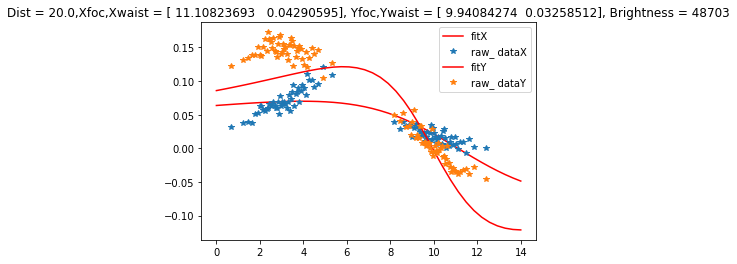

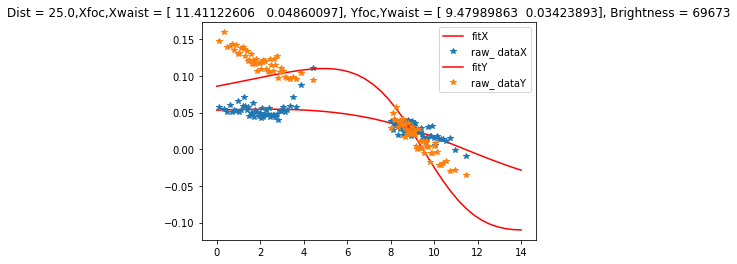

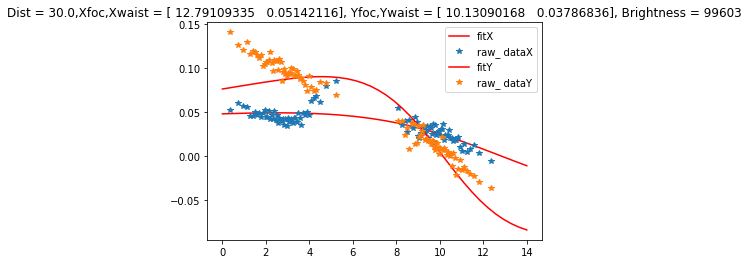

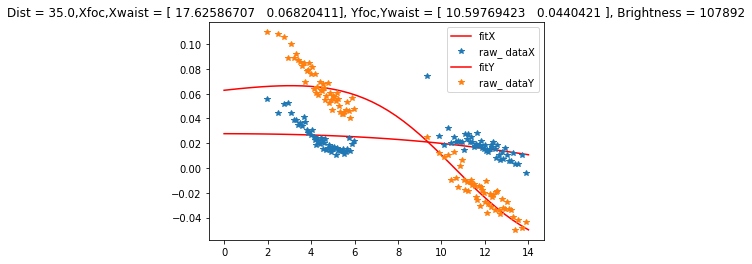

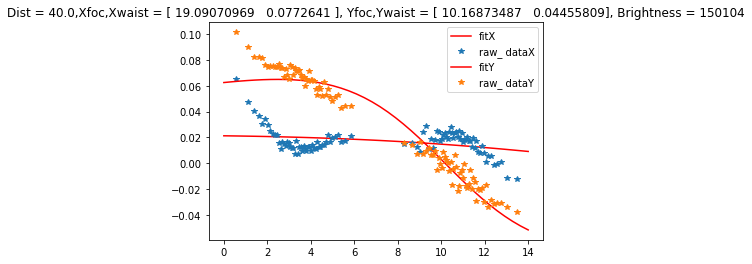

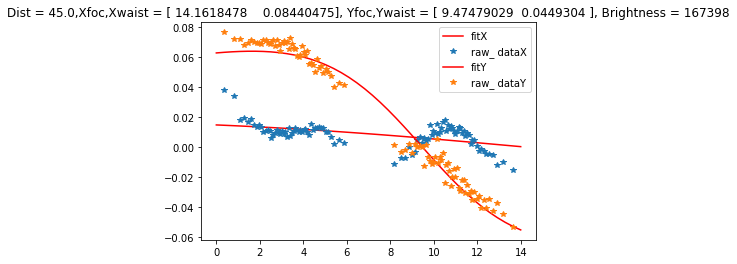

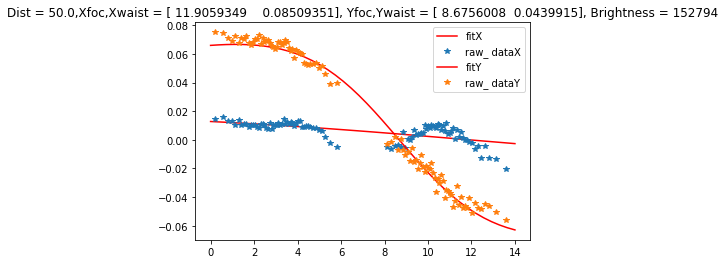

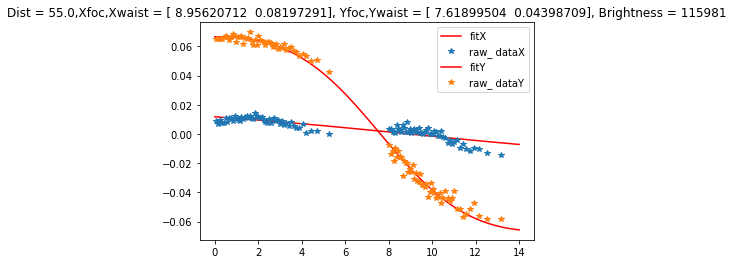

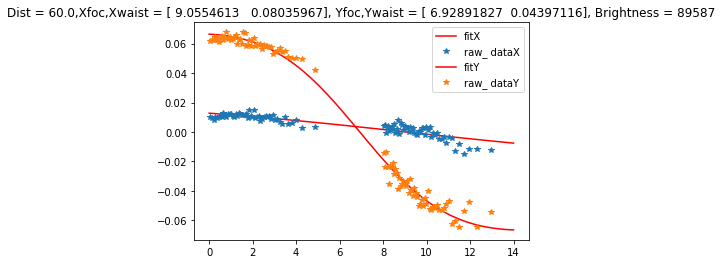

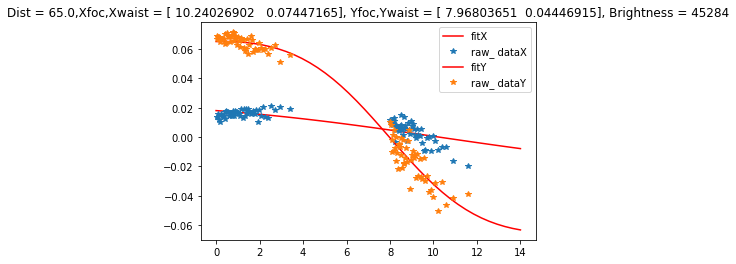

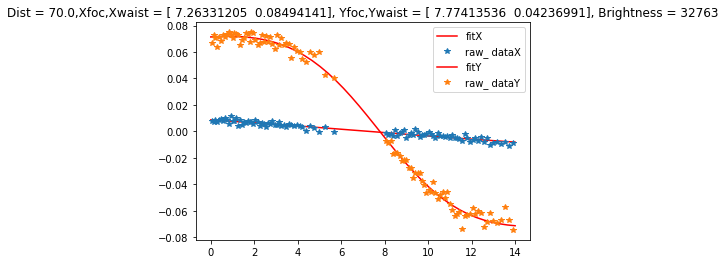

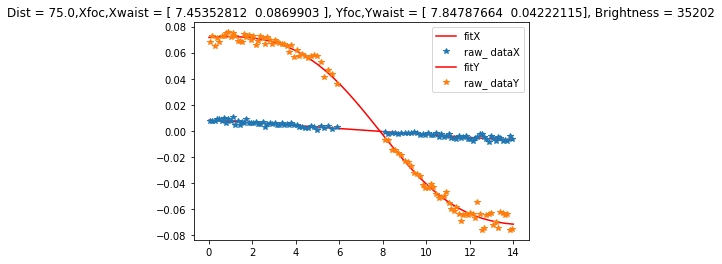

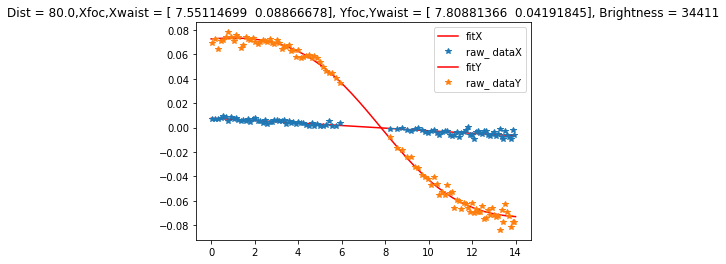

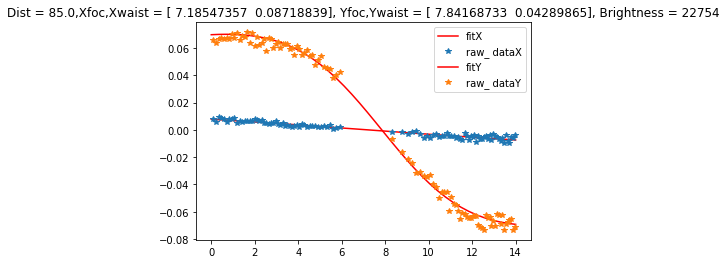

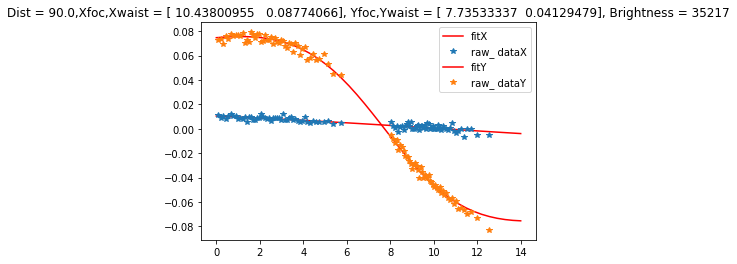

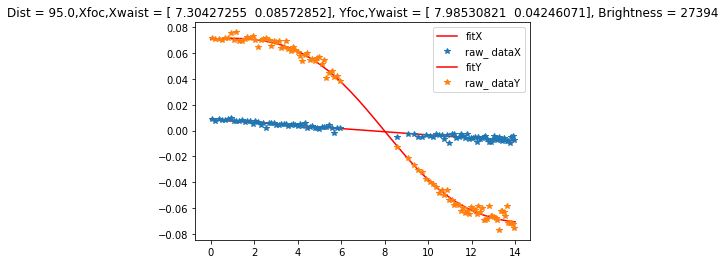

In [23]:
for i,result in enumerate(big_results[1]):
    plt.figure
    propangle_H = result[2][1][1]
    propangle_V = result[2][3][1]
    
    result_sorted_H_ind=np.argsort(result[2][1][0].T[2])
    result_sorted_V_ind=np.argsort(result[2][3][0].T[2])
    splitH_ind=np.array_split(result_sorted_H_ind,50)
    splitV_ind=np.array_split(result_sorted_V_ind,50)



    slope_list=[]
    for indH,indV in zip(splitH_ind,splitV_ind):
        XH=result[2][1][0].T[0][indH]
        YH=propangle_H[indH].T[0]
        
        XV=result[2][3][0].T[0][indV]
        YV=propangle_V[indV].T[0]
        
        XHy=result[2][1][0].T[1][indH]
        YHy=propangle_H[indH].T[1]
        
        XVy=result[2][3][0].T[1][indV]
        YVy=propangle_V[indV].T[1]
        slopes=[]
        slopes.append(get_curv(XH,YH))
        slopes.append(get_curv(XV,YV))
        slopes.append(get_curv(XHy,YHy))
        slopes.append(get_curv(XVy,YVy))
        
        
        slope_list.append(slopes)
    
    curvatureX=list(flatten([[y[0] for y in slope_list],[y[1] for y in slope_list]]))
    zposX=list(flatten([[np.mean(result[2][1][0].T[2][X]) for X in splitH_ind],[np.mean(result[2][3][0].T[2][X]) for X in splitV_ind]]))
    
    curvatureY=list(flatten([[y[2] for y in slope_list],[y[3] for y in slope_list]]))
    zposY=list(flatten([[np.mean(result[2][1][0].T[2][X]) for X in splitH_ind],[np.mean(result[2][3][0].T[2][X]) for X in splitV_ind]]))

    poptY, pcovY = scipy.optimize.curve_fit(fit_func, zposY, curvatureY,p0=[7,0.050],bounds=[(0,0.001),(50,0.5)])
    poptX, pcovX = scipy.optimize.curve_fit(fit_func, zposX, curvatureX,p0=[7,0.050],bounds=[(0,0.001),(50,0.5)])
    
    plt.plot(np.linspace(0,14,40), fit_func(np.linspace(0,14,40), *poptX), 'r-', label='fitX')
    plt.plot(zposX, curvatureX, '*',label='raw_ dataX')
    plt.plot(np.linspace(0,14,40), fit_func(np.linspace(0,14,40), *poptY), 'r-', label='fitY')
    plt.plot(zposY, curvatureY, '*',label='raw_ dataY')
    plt.legend()
    plt.title("Dist = {},Xfoc,Xwaist = {}, Yfoc,Ywaist = {}, Brightness = {}".format(dist_list[i],poptX,poptY,len(propangle_H)+len(propangle_V)))
    plt.show()

In [142]:
###Lens test ### 
def rayset(N=15,xrange=[-2,2],lam=850):
    X,Y = np.meshgrid(np.linspace(xrange[0],xrange[1],N),np.linspace(xrange[0],xrange[1],N))
    pos = np.array([[x,y,0] for x,y in zip(flatten(X),flatten(Y))])
    angles = np.zeros((N**2,2))
    wavelength = np.full((N**2,1),lam,dtype=float)
    pol = np.full((1),'V',dtype=str)
    times = np.full((N**2,1),0,dtype=float)
    return [[pos,angles,wavelength,times,pol]]

def run_lens_sim_ACH(pos=[0,0,10],centre=[0,0],f=20):
    ACH=Lens.achromat(position = pos,centre=centre,f=f)
    sim3=Simulation(rays=[0],setup=ExpSetup(ACH))
    sim3.start_list=rayset()
    sim3.run()
    return sim3

def run_lens_sim_ASPH(pos=[0,0,10],centre=[0,0],f=20):
    ACH=Lens.asphere(position = pos,centre=centre,f=f)
    sim3=Simulation(rays=[0],setup=ExpSetup(ACH))
    sim3.start_list=rayset()
    sim3.run()
    return sim3

def run_lens_sim_ASPHI(pos=[0,0,10],centre=[0,0],f=20):
    ACH=Lens.asphereI(position = pos,centre=centre,f=f)
    sim3=Simulation(rays=[0],setup=ExpSetup(ACH))
    sim3.start_list=rayset()
    sim3.run()
    return sim3

def run_lens_sim_ASPHII(pos=[0,0,10],centre=[0,0],f=20):
    ACH=Lens.asphereII(position = pos,centre=centre,f=f)
    sim3=Simulation(rays=[0],setup=ExpSetup(ACH))
    sim3.start_list=rayset()
    sim3.run()
    return sim3

[0.0, 8.625, 11.375, 31.375]


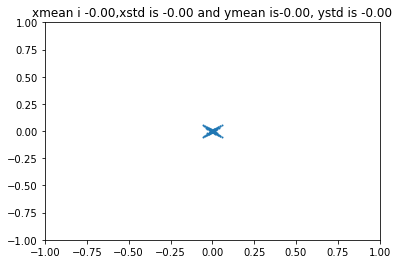

In [163]:
vis20=Visualization(simulation=run_lens_sim_ASPH(pos=[0,0,10],centre=[0,0.]))
print(vis20.surface_pos)
vis20.showpos_single(pos=11.15+7.8)

[0.0, 8.9000000000000004, 11.100000000000001, 11.100000000000001, 31.100000000000001]


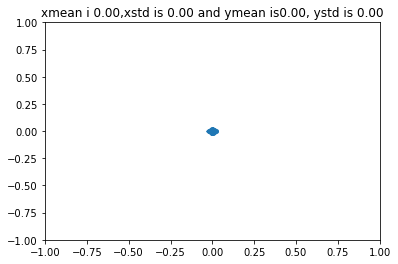

In [144]:
vis20=Visualization(simulation=run_lens_sim_ASPHI(pos=[0,0,10],centre=[0,0.]))
print(vis20.surface_pos)
vis20.showpos_single(pos=11.15+13.3)

[0.0, 8.625, 11.375, 31.375]


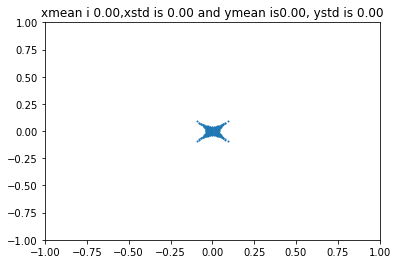

In [145]:
vis20=Visualization(simulation=run_lens_sim_ASPHII(pos=[0,0,10],centre=[0,0.]))
print(vis20.surface_pos)
vis20.showpos_single(pos=11.15+5.9)

[0.0, 7.6999999999999993, 10.0, 11.300000000000001, 31.299999999999997]


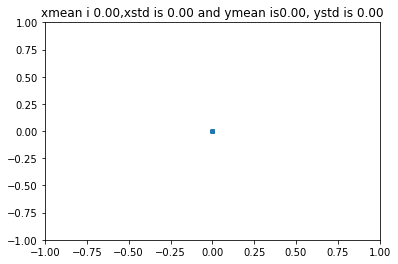

In [160]:
vis20=Visualization(simulation=run_lens_sim_ACH(pos=[0,0,10],centre=[0,0.]))
print(vis20.surface_pos)
vis20.showpos_single(pos=11.3+10.3)

In [275]:
lensd_result[2]

array([[  2.10611313e+01,  -6.15613231e-02,  -7.11783731e-03],
       [  2.14809385e+01,  -9.87893084e-02,   8.93314313e-03],
       [  2.25773397e+01,   7.74946423e-02,  -3.33066046e-03],
       [  2.36324004e+01,   8.51701494e-02,   4.61848173e-04],
       [  2.52110515e+01,  -9.69841263e-02,   5.44238260e-03],
       [  2.70025653e+01,  -4.26404965e-02,  -1.15113265e-02],
       [  2.62991809e+01,  -3.84058714e-02,  -9.46649066e-03],
       [  2.85955969e+01,  -6.44546703e-02,  -4.13779548e-03],
       [  2.84329587e+01,  -6.48704636e-02,  -3.03902939e-03],
       [  3.09922204e+01,   4.65877172e-02,  -4.56056524e-02],
       [  3.13883469e+01,   5.17907666e-02,  -4.47686927e-02],
       [  3.17492292e+01,   5.66726641e-02,  -4.87839525e-02],
       [  3.06597312e+01,  -2.42181611e-02,  -4.62895601e-02],
       [  3.22841334e+01,   5.80386027e-02,  -4.70495864e-02],
       [  3.16386364e+01,  -6.60410743e-02,  -1.06860694e-02],
       [  3.19398107e+01,  -7.05720238e-02,  -7.8529322

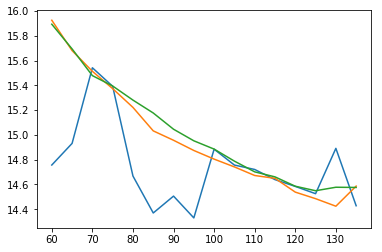

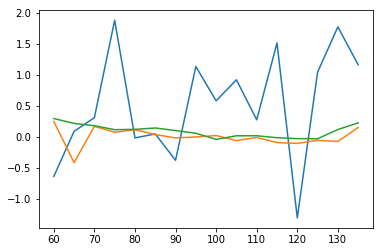

In [259]:
lensd_result1=np.load("C:/Users/Arian Stolk/Documents/optim_sweep_08112017_60to160d5_foc06_asph_110.npz")['arr_0']
lensd_result2=np.load("C:/Users/Arian Stolk/Documents/optim_sweep_08112017_60to160d5_foc06_asph_110_V2.npz")['arr_0']
dist_list=np.linspace(60,135,16)


plt.figure()
for x in lensd_result1:
    plt.plot(dist_list,x.T[0])
plt.show()

plt.figure()
for x in lensd_result2:
    plt.plot(dist_list,x.T[0])
plt.show()

In [18]:
lensd_result=np.array([(lensd_result.T)[1],(lensd_result.T)[2],(lensd_result.T)[0]])

In [11]:
Crystal1=Crystal(name = 'BBO1',material = 'BBO',position = [0,0,3],thickness = 6,orientation="up",cutangle=28.76*np.pi/180)
HalfWave = HWP(name='Hwp',material=None,position=[0,0,7],thickness=0,cutoff=500)
Crystal2=Crystal(name = 'BBO2',material = 'BBO',position = [0,0,11],thickness = 6,orientation="up",cutangle=28.76*np.pi/180)
Crystal3=Crystal(name = 'YVO1',material = 'YVO4',position = [0,0,19],thickness = 3.12 ,orientation="left",cutangle=90*np.pi/180)
ACH=Lens.asphere(position = [0,0,60],centre=[-0.6,0,0],f= 50)
Csetup=ExpSetup(Crystal1,HalfWave,Crystal2,Crystal3,ACH)
sim_test=Simulation(rays=[0],setup=Csetup,store_path=True,store_time=True)
cProfile.run('sim_test.run(Ntot=5000000,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=[0.06,0.03],pump_focus=[8,8],l_min=650,theta_min=-2*np.pi/180,theta_max=2*np.pi/180,cutangle=28.76*np.pi/180)',sort="time")

         1202 function calls in 6.490 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    2.140    1.070    2.623    1.312 main.py:96(phasefunction_vec)
        1    1.720    1.720    5.971    5.971 main.py:555(get_SPDC_rayset_adv)
        4    0.563    0.141    0.563    0.141 {method 'randn' of 'mtrand.RandomState' objects}
       24    0.484    0.020    0.484    0.020 main.py:27(Sellmeier)
       24    0.436    0.018    0.436    0.018 {built-in method numpy.core.multiarray.concatenate}
        6    0.232    0.039    0.232    0.039 {method 'uniform' of 'mtrand.RandomState' objects}
        2    0.220    0.110    0.220    0.110 numeric.py:1076(outer)
        4    0.109    0.027    0.450    0.112 main.py:444(complete_ray_propagation)
       70    0.088    0.001    0.088    0.001 {method 'repeat' of 'numpy.ndarray' objects}
       66    0.069    0.001    0.069    0.001 main.py:880(getn)
        1    0.069    0.069   

In [1]:
3*3**2

27

In [3]:
import numpy as np
np.pi*3**2

28.274333882308138

In [4]:
np.pi*3*3

28.274333882308138